<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2025-2</h1>

<h2>Evelyn Venegas Agustín</h2> 

---
### Profesor Sergio Alcalá Corona
Práctica 5
---

#### Ejercicio 3

a)
1. Escribe un programa que:
   - Lea este archivo y almacene los datos en una matriz.
   - Calcule las derivadas parciales **∂w/∂x** y **∂w/∂y** en cada punto de la cuadrícula.

2. Explica el método que utilizaste para calcular las derivadas y el motivo de tu elección.

- Probablemente necesitarás usar más de un método para obtener las derivadas en cada punto de la cuadrícula debido a situaciones particulares que ocurren en los bordes.
- Para calcular las derivadas, necesitas conocer:
  - El valor de **h**.
  - La distancia en metros entre puntos de la cuadrícula, que en este caso es aproximadamente **30,000 m**.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
#primero abriremos el archivo y lo leeremos

archivo = np.loadtxt('altitudes.txt')

#lo guardamos en una matriz
altitudes = archivo

#ahora vamos a definir la derivada numérica, por casos
def calcular_derivadas(datos, h):

    filas, columnas = datos.shape #shape nos calcula el tamaño de la matriz
    dw_dx = np.zeros_like(datos) #inicializamos las derivadas en x y en y
    dw_dy = np.zeros_like(datos)

    #ahora, para calcular la derivada en cada punto usaremos las definiciones de clase
    #pero para los bordes, como no tienen a su vecino, usaremos la diferencia por la derecha o por la
    #izquierda, según sea el caso
    for i in range(filas):
        for j in range(columnas):
            #este bloque calcula la derivada en x
            if j == 0:
                #borde izquierdo
                dw_dx[i, j] = (datos[i, j+1] - datos[i, j]) / h
            elif j == columnas - 1:
                #borde derecho
                dw_dx[i, j] = (datos[i, j] - datos[i, j-1]) / h
            else:
                #punto aleatorio interno
                dw_dx[i, j] = (datos[i, j+1] - datos[i, j-1]) / (2 * h)
                
            #y este la derivada en y
            if i == 0:
                #borde superior
                dw_dy[i, j] = (datos[i+1, j] - datos[i, j]) / h
            elif i == filas - 1:
                #borde inferior
                dw_dy[i, j] = (datos[i, j] - datos[i-1, j]) / h
            else:
                #punto aleatorio interno
                dw_dy[i, j] = (datos[i+1, j] - datos[i-1, j]) / (2 * h)
    
    return dw_dx, dw_dy

#ahora calculamos la derivada en cada punto que guardamos en la matriz

derivadas_X,derivadas_y = calcular_derivadas(altitudes, 30000)

b) 
1. **Usa los valores calculados para las derivadas parciales** (**∂w/∂x** y **∂w/∂y**) en cada punto de la cuadrícula.
2. Calcula la intensidad para cada punto de la cuadrícula asumiendo que el ángulo \(\phi = 45^\circ\).
3. **Genera un gráfico de densidad** de los valores resultantes:
   - El brillo de cada punto depende del valor de intensidad correspondiente.
   - Si el programa funciona correctamente, el gráfico debería parecerse a un **mapa en relieve del mundo**, donde se puedan observar continentes y cadenas montañosas en 3D.

Al trabajar en esta parte, podrías encontrarte con los siguientes problemas:
- El mapa puede aparecer **al revés** o **de lado**.
- El relieve puede estar **"de adentro hacia afuera"**, es decir, las regiones altas parecen bajas y viceversa.

Trabaja con los detalles del programa hasta que obtengas un mapa que sea adecuado.

- El valor de la intensidad \(I\) oscila entre \(+1\) y \(-1\).
  - Un valor de intensidad negativa indica que el área está en **sombras** (en el lado opuesto de la montaña para recibir luz).
- Para representar estas áreas:
  - Puedes **colorearlas de negro**, aunque podrías obtener una imagen más bonita (aunque menos realista) usando una gama continua de grises desde \(+1\) hasta \(-1\).

El mapa generado debería mostrar:
- **Brillos para áreas iluminadas**.
- **Sombras para áreas oscuras**, representando correctamente el relieve de la superficie.


Usaremos la fórmula

$$ I= \frac{cos \phi (\partial w / \partial x) + sin \phi (\partial w / \partial y)}{\sqrt{(\partial w / \partial x)^2 + (\partial w / \partial y)^2 +1}} $$

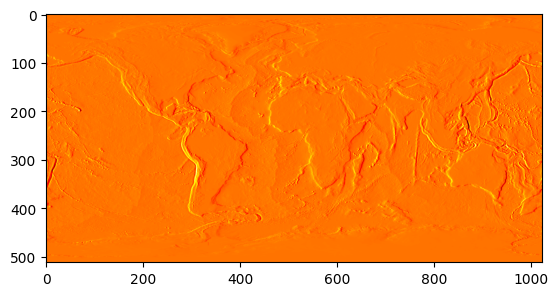

In [3]:
from pylab import imshow, show, hot

#ahora tenemos que calcular I para cada punto
def intensidad(derivada_x, derivada_y, phi):
    filas, columnas = derivada_x.shape #igual que antes, calculamos el tamaño de la matriz de intensidades
    I = np.zeros((filas, columnas)) #la inicializamos
    for i in range(filas):
        for j in range(columnas): #y calculamos I para cada punto
            I[i,j]=((np.cos(np.radians(phi)) * derivada_x[i, j]) + (np.sin(np.radians(phi)) * derivada_y[i, j])) / (np.sqrt(derivada_x[i, j]**2 + derivada_y[i, j]**2 + 1))
    return I

#aplicamos la función
I = intensidad(derivadas_X, derivadas_y, 0)

#y hacemos el density plot
imshow(I, cmap='hot')
show()


c) El otro archivo adjunto llamado stm.txt, contiene una cuadr ́ıcula con valores
de mediciones de un microscopio de efecto tunel (  ́ scanning tunneling microscope o
STM) de la superficie (111) del silicio. Un microscopio de efecto tunel (  ́ STM) es un
dispositivo que mide la forma de superficies a nivel atomico siguiendo una punta  ́
afilada sobre la superficie y midiendo la corriente de efecto t  ́unel cu ́antico en funcion ́
de la posicion. El resultado final es una cuadr  ́  ́ıcula de valores que representan la
altura de la superficie en funcion de la posici  ́ on y los datos del archivo  ́ stm.txt
contienen precisamente esa rejilla de valores. Modifica tu programa anterior para
visualizar los datos STM y as ́ı crear una imagen 3D de como se ve la superficie de  ́
silicio. El valor de h para las derivadas en este caso es de alrededor de h = 2.5 (en
unidades arbitrarias).

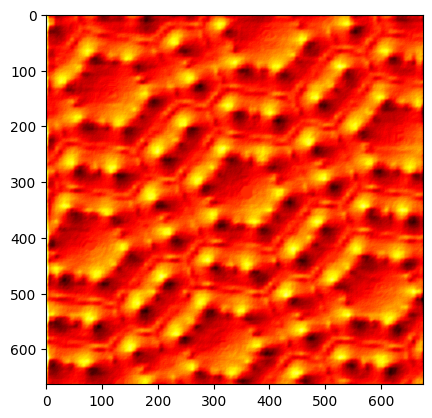

In [4]:
#usaremos las mismas funciones para este archivo

#leemos el archivo y lo guardamos en una matriz

archivo_stm = np.loadtxt('stm.txt')
stm=archivo_stm

#calculamos las derivadas
derivadas_X_stm,derivadas_y_stm = calcular_derivadas(stm, 2.5)

#calculamos I
I_stm = intensidad(derivadas_X_stm, derivadas_y_stm, 45)

#y hacemos el density plot
imshow(I_stm, cmap='hot')
show()

#### Ejercicio 1

1. Crea una función **f(x)** que devuelva:
   $$f(x) = 1 + \frac{1}{2} \tanh(2x)$$

2. Usa diferencias centrales para calcular numéricamente la derivada de la función en el intervalo **−2 ≤ x ≤ 2**.

3. Calcula la derivada de **f(x)** de forma analítica.

4. Grafica los resultados:
   - Muestra el resultado numérico y la respuesta analítica en el mismo gráfico.
   - Es útil representar la respuesta analítica como líneas continuas y los valores numéricos como puntos.

- Utiliza la función **tanh** del paquete `math`.


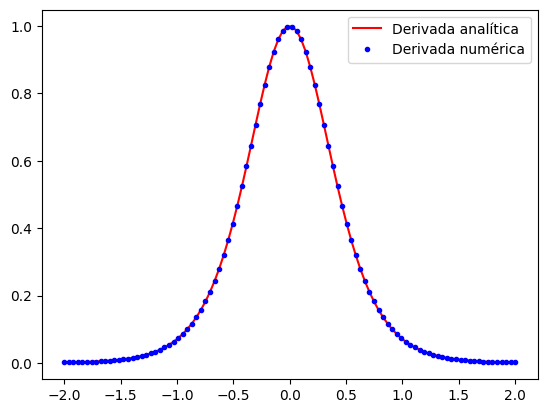

In [5]:
from math import tanh
from math import cosh
import numpy as np
import matplotlib.pyplot as plt
#creamos primero la función

def fx(x):
    return 1+0.5*tanh(2*x)

#como hicimos en clase, creamos la función que calculará la derivada

def derivada(f,x0,h):
    return (f(x0+h)-f(x0-h))/(2*h)

#sabemos que su derivada analítica es sech(2x)^2

def fprima_analítica(x):

    derivada=[]
    x=np.linspace(-2,2,100)

    for i in x:
        derivada.append(1/cosh(2*i)**2)
    return derivada
#ahora calculamos la derivada numérica

f_derivada=[]
x=np.linspace(-2,2,100)

for i in x:
    f_derivada.append(derivada(fx,i,0.01))

#y graficamos ambas para compararlas

plt.plot(x,fprima_analítica(x),'r',label="Derivada analítica")
plt.plot(x,f_derivada,'b.',label="Derivada numérica")   
plt.legend()
plt.show()



#### Ejercicio 2

a)
1. Supón que tienes **dos cargas puntuales**:
   - **Carga 1:** +1 C
   - **Carga 2:** −1 C  
   Separadas por **10 cm**.

2. Calcula el **potencial eléctrico resultante** en un plano cuadrado de \(1 \, \text{m} \times 1 \, \text{m}\):
   - El plano rodea las cargas y pasa a través de ellas.

3. Calcula el potencial en puntos espaciados a **1 cm** formando una cuadrícula.

4. Genera una **visualización del potencial** en pantalla usando un **gráfico de densidad**.

El gráfico generado debe mostrar una representación del potencial eléctrico en todo el plano cuadrado, donde:
- Las áreas cercanas a las cargas muestran **altos valores positivos y negativos**.
- Las líneas de equipotencial formen patrones simétricos alrededor de las cargas.
- Utiliza un **gráfico de densidad** para representar el potencial en cada punto del plano cuadrado.
- Colores más brillantes indican **mayor intensidad del potencial positivo**.
- Colores oscuros representan **mayor intensidad del potencial negativo**.


Ya sabemos que

$$ \phi = \frac{q}{4 \pi \epsilon_0 r} $$

y que

$$ E=-\nabla \phi $$

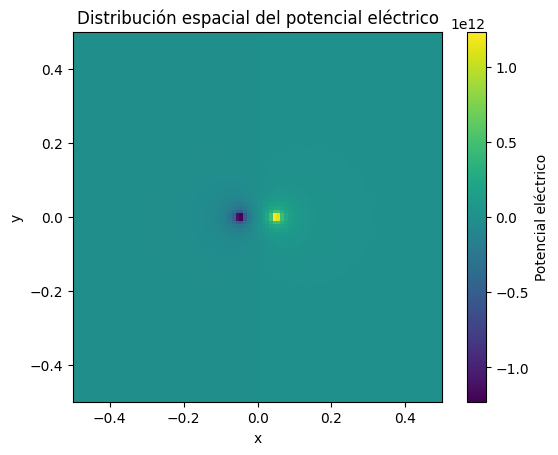

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#primero definiremos la función potencial

def potencial(q,r):
    return q/(4*np.pi*8.8541878176e-12*r)

#vamos a crear nuestra cuadrícula (asumiendo que todo está en metros)

x = np.linspace(-0.5,0.5,100)
y = np.linspace(-0.5,0.5,100)
X,Y = np.meshgrid(x,y)

r1=np.sqrt((X-0.05)**2 + Y**2) #distancia al primer punto
r2=np.sqrt((X+0.05)**2 + Y**2) #distancia al segundo punto

phi1=np.zeros_like(r1) #inicializamos el potencial
phi2=np.zeros_like(r2)

phi1[r1!=0]=potencial(1,r1[r1!=0]) #calculamos el potencial excluyendo el 0 para evitar singularidades
phi2[r2!=0]=potencial(-1,r2[r2!=0])

#por principio de superposición

phi=phi1+phi2

im = plt.imshow(phi, extent=(-0.5, 0.5, -0.5, 0.5))
plt.colorbar(im, label="Potencial eléctrico")
plt.title("Distribución espacial del potencial eléctrico")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


b)
1. Calcula las **derivadas parciales** del potencial con respecto a \(x\) y \(y\):
   - Estas derivadas representan las componentes del **campo eléctrico** \(E_x\) y \(E_y\) en el plano \(xy\).

2. Realiza una **visualización** del campo eléctrico en el plano \(xy\):
   - Usa un gráfico que muestre las líneas de campo eléctrico.
   - Representa la dirección y magnitud de las fuerzas en el campo eléctrico.

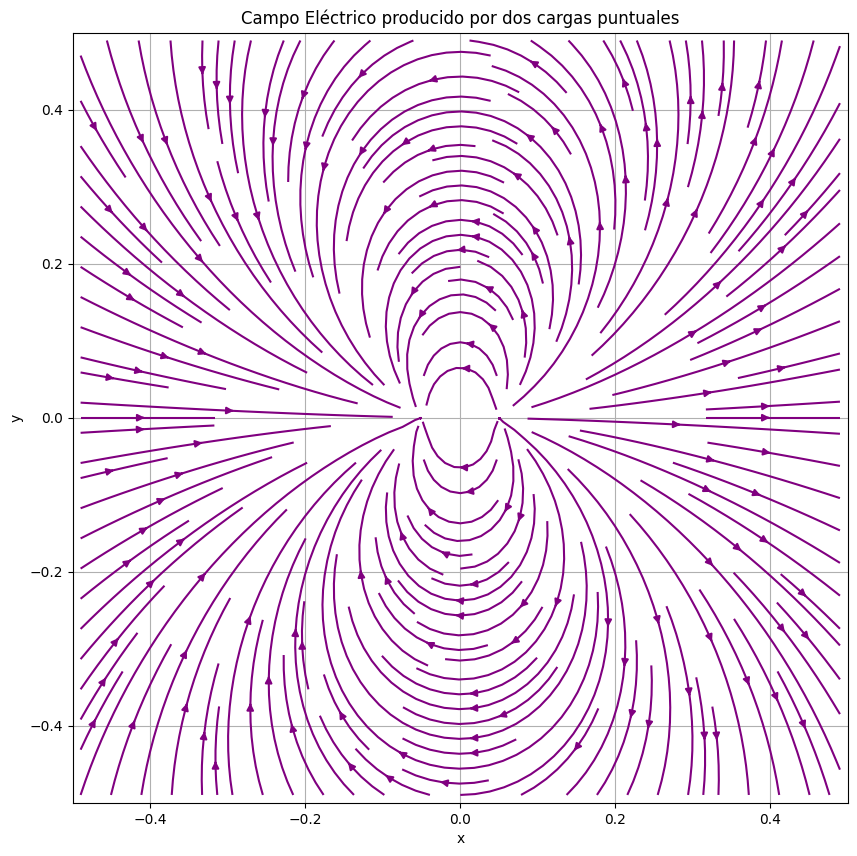

In [7]:
#igual que en el ejercicio 3, usaremos la derivada central
#sin embargo, ahora no es necesario tener cuidado con los bordes
def dphi_dx(pot, h):
    return (pot[1:-1, 2:]-pot[1:-1, :-2])/h

def dphi_dy(pot, h):
    return (pot[2:, 1:-1]-pot[:-2, 1:-1])/h

def campo_eléctrico(pot, h):
    Ex= -dphi_dx(pot, h)
    Ey = -dphi_dy(pot, h)
    return Ex, Ey

h = 0.01
Ex, Ey = campo_eléctrico(phi, h)
X_m, Y_m = np.meshgrid(x[1:-1], y[1:-1])

plt.figure(figsize=(10, 10))
plt.streamplot(X_m, Y_m, Ex, Ey, density=1.7, color='purple') #streamplot nos dibujará el campo vectorial
plt.title("Campo Eléctrico producido por dos cargas puntuales")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.grid()
plt.show()

c) Ahora supongamos que tenemos una distribución continua de carga sobre un cuadrado de L × L. La densidad de carga en C/m2 es:

$$ \sigma(x,y)= q_0 sin \frac{2 \pi x}{L} sin \frac{2 \pi y}{L} $$

1. Calcula y visualiza el **campo eléctrico resultante** en puntos espaciados a **1 cm** dentro de un área de **1 metro cuadrado** en el plano \(xy\).
2. En este caso:
   - $$L = 10 \, \text{cm}$$
   - La distribución de carga está centrada en el medio del área visualizada.
   - $$q_0 = 100 \, \text{C/m}^2$$

3. Realiza una **integral doble** sobre \(x\) y \(y\), y luego **diferencia el potencial** respecto a la posición para obtener el campo eléctrico.
4. Elige cualquier **método de integración** que sea apropiado para las integrales.


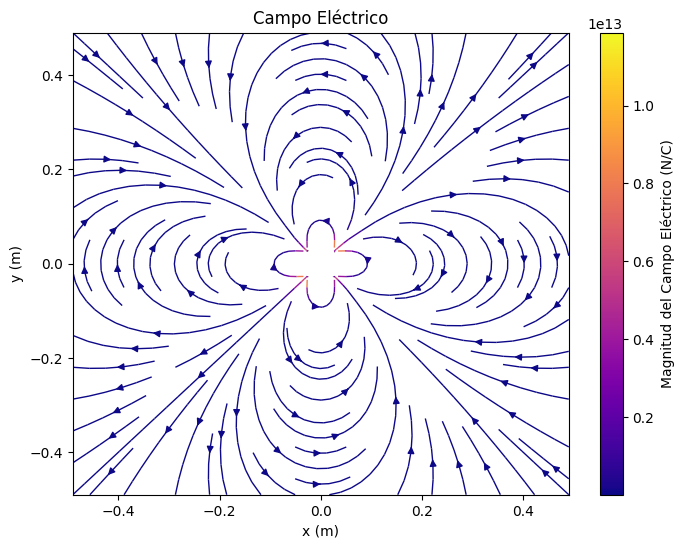

In [8]:
from scipy.special import roots_legendre #usaremos la cuadratura doble para este problema

#es más fácil si definimos constantyes desde el principio
L=0.1 #m
q0=100  
epsilon0=8.8541878176e-12

#luego, definimos la carga superficial
def sigma(x, y):
    return q0 * np.sin(2 * np.pi * x / L) * np.sin(2 * np.pi * y / L)

#como antes, vamos a hacer nuestra cuadrícula
N=20
x_v = np.linspace(-0.5, 0.5, 100)  #metros
y_v = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x_v, y_v)


def integral2D(f,a,b,c,d,N): #usaremos la misma función de la tarea pasada
    #vamos a calcular los puntos y pesos para x y y
    x, wx = np.polynomial.legendre.leggauss(N)
    xp = 0.5*(b-a)*x+0.5*(b+a) 
    wxp = 0.5*(b-a)*wx

    y, wy = np.polynomial.legendre.leggauss(N)
    yp = 0.5*(d-c)*y+0.5*(d+c) 
    wyp = 0.5*(d-c)*wy 

    #y vamos a hacer la doble sumatoria
    integral=0
    for i in range(N):
        for j in range(N):
            integral += wxp[i]*wyp[j]*f(xp[i],yp[j])  # Suma ponderada

    return integral


def potencial(x, y): #ahora definiremos cómo sacar el potencial integrando la distribución de carga
    def integrand(xp, yp):
        r = np.sqrt((x - xp)**2 + (y - yp)**2)
        if r == 0:  # Evitar división por cero
            return 0
        return sigma(xp, yp) / r
    return (1 / (4 * np.pi * epsilon0)) * integral2D(integrand, -L/2, L/2, -L/2, L/2, N)

#calculamos el potencial
V = np.zeros_like(X) #inicializamos
for i in range(100):
    for j in range(100):
        V[i, j] = potencial(X[i, j], Y[i, j])

# Calculamos el campo eléctrico usando la funcion Campo definida en el inciso b 
h = 0.01 
Ex_2, Ey_2 = campo_eléctrico(V, h)

# Ajuste de dimensiones para graficar
X, Y = X[1:-1, 1:-1], Y[1:-1, 1:-1]

# Graficar el campo eléctrico
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, Ex_2, Ey_2, color=np.sqrt(Ex_2**2 + Ey_2**2), linewidth=1, cmap='plasma')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Campo Eléctrico")
plt.colorbar(label="Magnitud del Campo Eléctrico (N/C)")
plt.show()